In [1]:
# k means clustering is the unsupervised learning method 
# in this practical we are going to perform kmeans on iris dataset and again will check in the orignal labeled dataset 
# that how accurate kmeans algorithm works

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("iris.csv")


In [28]:
df.drop(columns=['Species' ,'Id'] , inplace=True)
# we are remoeing the classification column
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

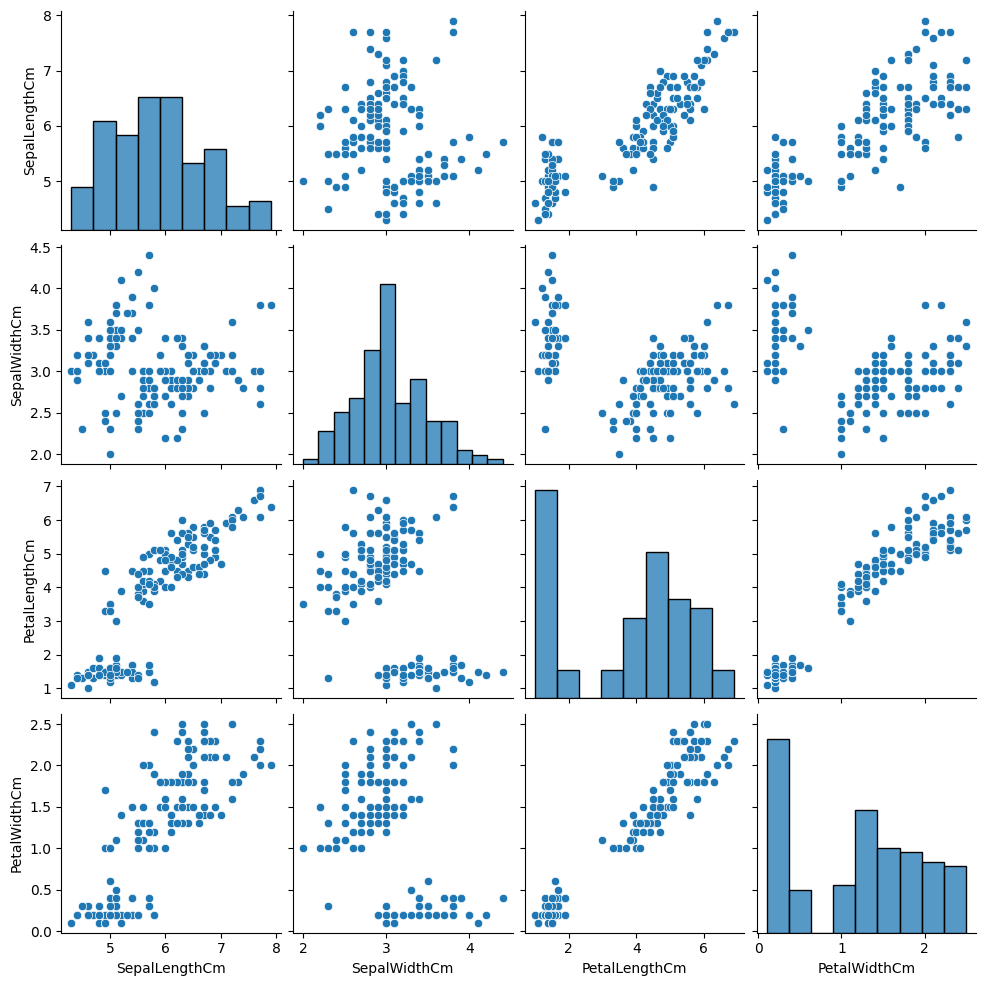

In [29]:
sns.pairplot(data = df)

In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss = []

for i in range(2,21):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(df)
    wcss.append(km.inertia_)
    
    

C:\Users\shant\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\shant\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\shant\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shant\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038

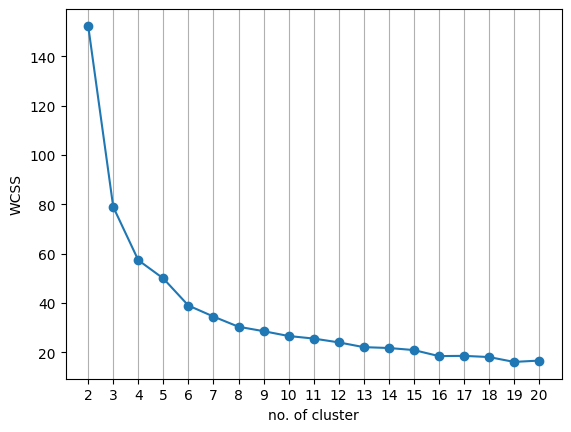

In [41]:
plt.plot([i for i in range(2,21)] , wcss, marker = "o")
plt.xlabel("no. of cluster")
plt.ylabel("WCSS")
plt.xticks([i for i in range(2,21)])
plt.grid(axis="x")

In [40]:
# now you can see by elbow method , the no.of clusters shoud be 3 as shown in above plot
# this is our actual elbow point 

In [43]:
# now again do k means for 3 clusters
kmn = KMeans(n_clusters=3)
df['Predict'] = kmn.fit_predict(df)

In [44]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Predict
0              5.1           3.5            1.4           0.2        1
1              4.9           3.0            1.4           0.2        1
2              4.7           3.2            1.3           0.2        1
3              4.6           3.1            1.5           0.2        1
4              5.0           3.6            1.4           0.2        1
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        0
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        0
148            6.2           3.4            5.4           2.3        0
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]

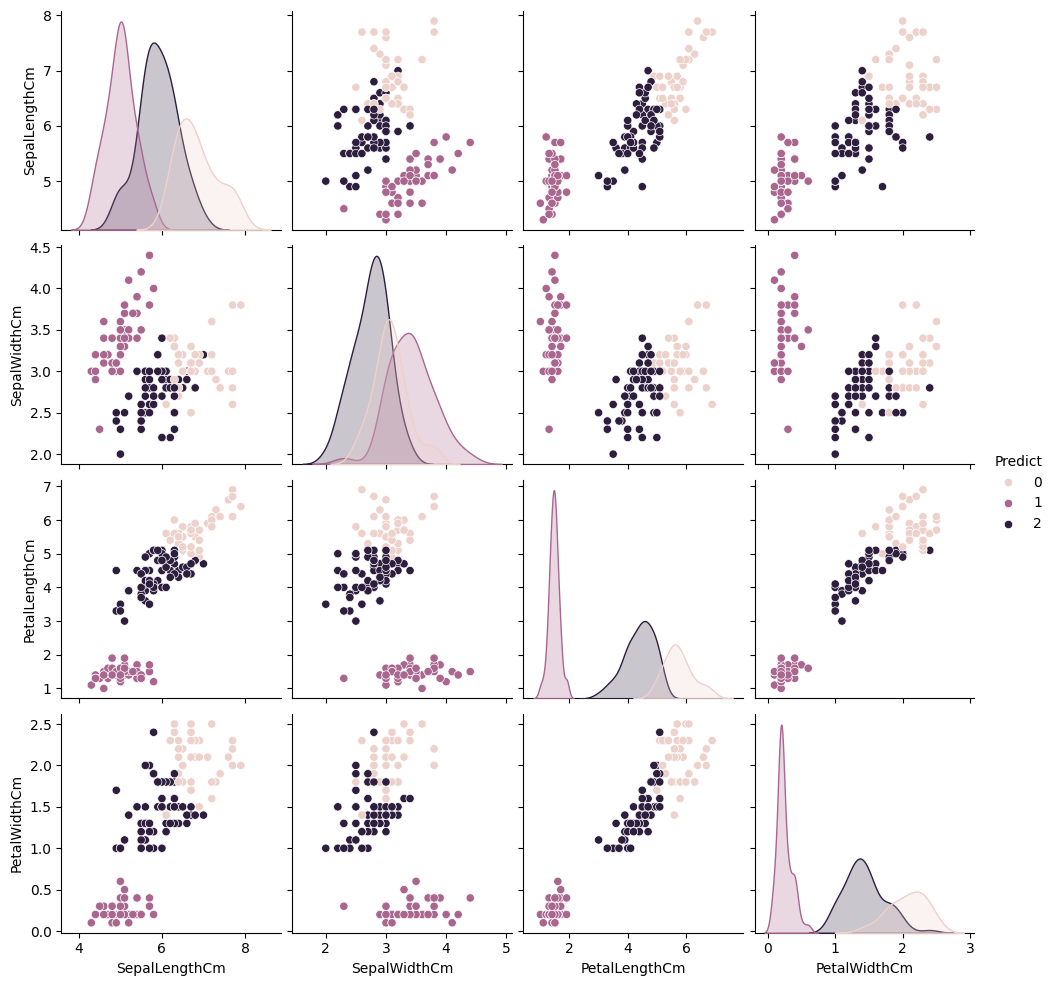

In [48]:
sns.pairplot(data = df , hue = "Predict") 
# this is our kmenas predicted pair plot

In [45]:
# our original data 
ogdata = pd.read_csv("iris.csv")

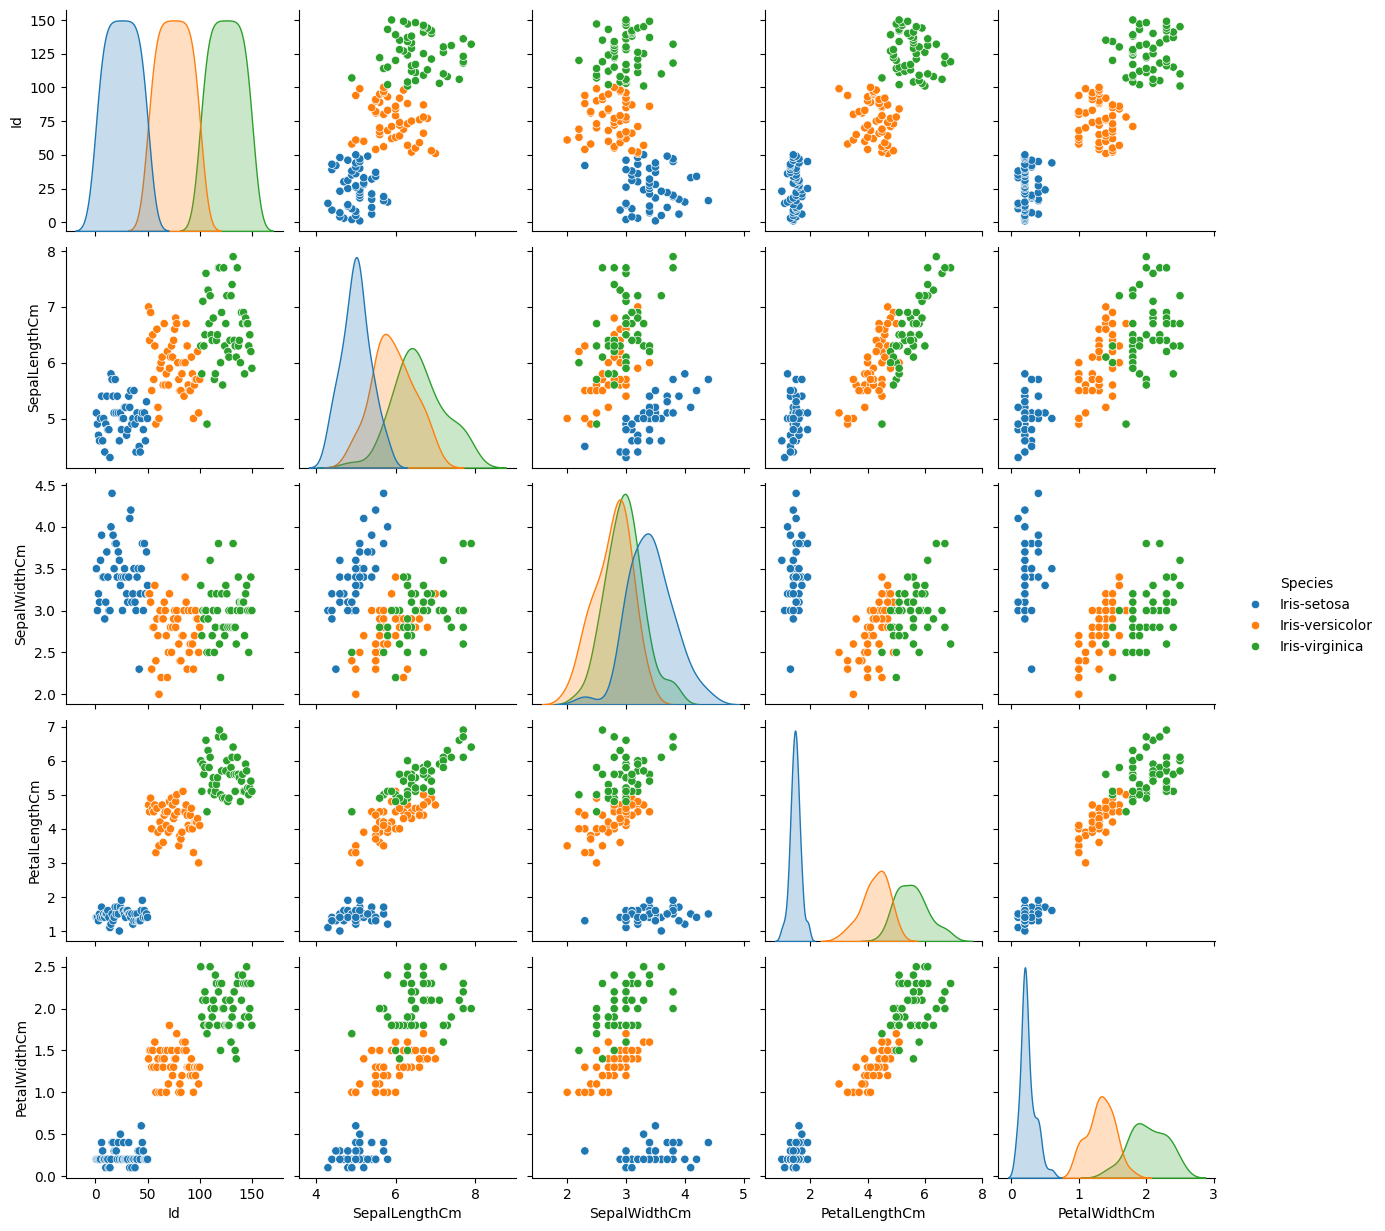

In [49]:
sns.pairplot(data = ogdata , hue = "Species")
# this is our actual original pair plot

In [50]:
# as you can see in both the plot that kmeans clustering work too efectively for the unsupervised learning 